### ANN ( A Single Neuron)
- Neuron in a neural network is a block of mathematical operations linking the entities.
- In an ANN a neuron takes inputs, adds some weight and biases to it, and applies some mathematical function knows as activation function to given the output.
- Refers to a biological inspired sub-field of AI modeled after the brain.
- Based on biological neural networks that construct ths structure of human brain.
- Similar to human brain has neurons interconnected to each other, ANN also has neuron linked 

## ANN- A single Neuron
- Block of mathematical operations lining the entities.
- z= w1x1+ w2x2 +b
- b= bias
- x1,x2= inputs
- w1,w2= corresponding weight
- f= activate function
- y=f(z), y=a/1+e^-z called sigmoid function (output between 0 and 1) -if data is non-liner sigmoid is used

- Input- pattern identified(hidden layer)- output layer (input and output layer are fixed):[Interconnected]
- Model Training and share output
- y^= 1/1+e^-z
- Error(E)= (y^-Y)^2/N
- To min error derivative is used also called gradient 
- Gradient Decent: Large number lai sano banauni like value 0 banauni
- Y^= sigmoid(z)= (w+sigmoidE/sigmiodW)+ (sigmoid+sigmoidE+sigmoidb-gradient of w)
- To train picture matrix is used
- In real world x is matrix (y=wx+b)



- Hidden layer- pattern identified
- softmax- is used in last layer
- Softmax: convert output to probability distribition

Epoch 0, Loss: 86784080016.7783
Epoch 1000, Loss: 86784080016.7783
Epoch 2000, Loss: 86784080016.7783
Epoch 3000, Loss: 86784080016.7783
Epoch 4000, Loss: 86784080016.7783


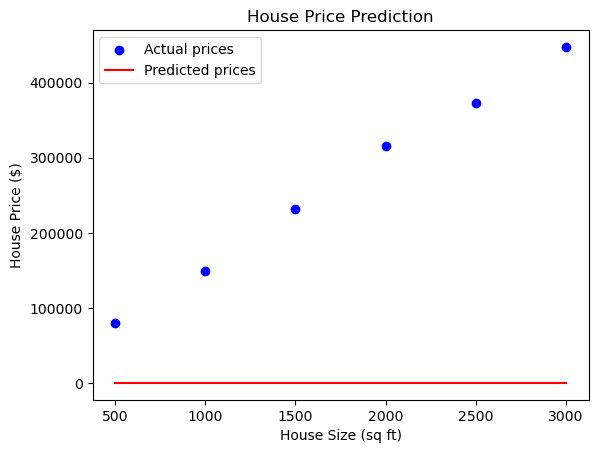

Predicted prices for test sizes:
Size: 1200 sq ft -> Predicted Price: $0.52
Size: 1600 sq ft -> Predicted Price: $0.52
Size: 2200 sq ft -> Predicted Price: $0.52
Size: 2700 sq ft -> Predicted Price: $0.52


In [3]:
## Deep Learning example
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


# Let's create some synthetic data for house sizes and corresponding prices
np.random.seed(42)
# House sizes (in square feet)
X = np.array([[500], [1000], [1500], [2000], [2500], [3000]])

# Corresponding house prices (in dollars, with some added noise)
# For example: Price = size * 150 + noise
y = X * 150 + (np.random.randn(*X.shape) * 10000)  # Random noise



# Neural Network Parameters
input_neurons = 1
hidden_neurons = 1
output_neurons = 1

# Random initialization of weights and biases
w1 = np.random.randn(input_neurons, hidden_neurons)  # Weight for input to hidden
b1 = np.random.randn(hidden_neurons)  # Bias for hidden layer

w2 = np.random.randn(hidden_neurons, output_neurons)  # Weight for hidden to output
b2 = np.random.randn(output_neurons)  # Bias for output layer

def forward_pass(x):
    # Input to hidden layer
    z1 = np.dot(x, w1) + b1
    a1 = sigmoid(z1)  # Apply sigmoid activation function
    
    # Hidden to output layer
    z2 = np.dot(a1, w2) + b2
    output = sigmoid(z2)  # Apply sigmoid activation function
    
    return output, a1


def compute_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)


def backpropagate(x, a1, y_true, y_pred, learning_rate=0.01):
    # Output layer error
    error_output = y_pred - y_true
    d_output = error_output * sigmoid_derivative(y_pred)  # Gradient of output layer
    
    # Hidden layer error
    error_hidden = d_output.dot(w2.T)  # Error propagated back to hidden layer
    d_hidden = error_hidden * sigmoid_derivative(a1)  # Gradient of hidden layer

     
    w2 -= a1.T.dot(d_output) * learning_rate  # Update weight for hidden to output
    b2 -= np.sum(d_output, axis=0) * learning_rate  # Update bias for output layer
    
    w1 -= x.T.dot(d_hidden) * learning_rate  # Update weight for input to hidden
    b1 -= np.sum(d_hidden, axis=0) * learning_rate  # Update bias for hidden layer

# Training Loop
epochs = 5000
for epoch in range(epochs):
    # Forward pass
    output, a1 = forward_pass(X)
    
    # Compute loss
    loss = compute_loss(output, y)
    
    # Backpropagation and weights update
    # backpropagate(X, a1, y, output, learning_rate=0.01)
    
    # Print the loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")
    # Predictions after training
output, _ = forward_pass(X)

# Plotting the data
plt.scatter(X, y, color='blue', label='Actual prices')  # Actual prices (blue dots)
plt.plot(X, output, color='red', label='Predicted prices')  # Predicted prices (red line)
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.title('House Price Prediction')
plt.legend()
plt.show()



# Test the model on new data
test_sizes = np.array([[1200], [1600], [2200], [2700]])
predicted_prices, _ = forward_pass(test_sizes)

# Display the predictions
print("Predicted prices for test sizes:")
for size, price in zip(test_sizes, predicted_prices):
    print(f"Size: {size[0]} sq ft -> Predicted Price: ${price[0]:.2f}")